# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Programming Task 2

## Student Id: 21045690

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [60]:
#import pandas
import pandas as pd
# read the two csv files into a two data frames df and df1
df = pd.read_csv('task2a.csv')
df1 = pd.read_csv('task2b.csv')

# merge the data frame df and df1
df2 = df.merge(df1, on= 'region') 

# check info of the merged data frame
df2.info()

# call on th merged  data frame
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    51 non-null     int64  
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_to_the_right           51 non-null     float64
 10  avg_biascrimes_per_100k                 

,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_to_the_right,avg_biascrimes_per_100k
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,2.397986


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [61]:
# remove rows containing missing values from the data frame df2

df2.dropna(axis= 0, inplace= True)

# remove column 'share_voters-voted_to_the_right'
df2.drop('share_voters_voted_to_the_right', axis = 1, inplace= True)

# check the statistcal description of the data frame 

df2.describe()

# check info of the clean merged data frame
#df2.info() 

# call on the clean merged data frame
#df2.head() 

,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,avg_biascrimes_per_100k
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,26.106383,55423.340426,0.050085,0.765957,0.868426,0.054043,0.090851,0.454511,0.310426,2.379352
std,15.151746,8817.840427,0.010523,0.177233,0.033165,0.031184,0.024122,0.021235,0.149389,1.744572
min,1.000000,39552.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.266941
25%,13.500000,48657.000000,0.042500,0.640000,0.840500,0.030000,0.075000,0.440000,0.200000,1.303706
50%,27.000000,55173.000000,0.051000,0.800000,0.874000,0.040000,0.090000,0.455000,0.280000,1.937083
75%,38.500000,60719.000000,0.057500,0.900000,0.897000,0.080000,0.100000,0.466500,0.420000,3.168247
max,51.000000,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.630000,10.953480


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the effects of household income on levels of bias crimes

Text(0.5, 1.0, 'Median Household Income VS Average Bias Crime')

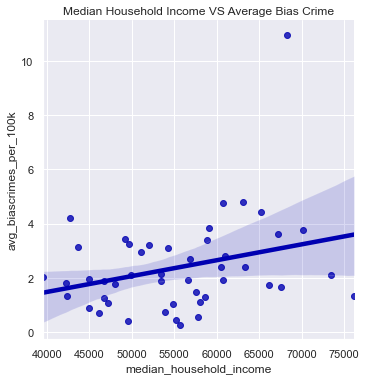

In [49]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("seismic")
sns.lmplot(x= 'median_household_income', y = 'avg_biascrimes_per_100k', data = df2) 
plt.title('Median Household Income VS Average Bias Crime')
# The plot suggest that there is no significant correlation between median household income and average bias crime
# The plot shows that there is no pattern between the two variables
# The plot shows that the points are scattered with one outlier 


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Test the hypothesis that household income has no effect on levels of bias crime

In [11]:
# Using regression analysis model
# import statsmodel

import statsmodels.formula.api as smf
reg = 'median_household_income ~ avg_biascrimes_per_100k'
regoutput = smf.ols(reg,df2).fit() 
print(regoutput.summary())

# using the corr function to check for correlation
correlation = df2[['median_household_income', 'avg_biascrimes_per_100k']].corr()
print('\n \n THE CORRELATION TABLE FOR MEDIAN HOUSEHOLD INCOME AND AVG BIAS CRIME \n', correlation) 

# The correlation value between the two variables is 0.295819. This shows that there is no significant 
# relationship between the two variables
# From the OLS Regression results the R-squared which means the coefficient of determination is 0.088
# that means the regression model explains 8.8 percent of the variability in the response. 
# The R-squared value is meant to show us how good the model will work, but in this case the value is very small
# which means our model might not be good enough
# The P value is less than 0.05 which is significant
# In conclusion, our model doesn't explain much on the variability but it is significant.
# The equation of the model is median_househould_income = 5.187e+04 + 1495.1989(avg_biascrimes_per_100k)

                               OLS Regression Results                              
Dep. Variable:     median_household_income   R-squared:                       0.088
Model:                                 OLS   Adj. R-squared:                  0.067
Method:                      Least Squares   F-statistic:                     4.316
Date:                     Mon, 24 Jan 2022   Prob (F-statistic):             0.0435
Time:                             20:42:34   Log-Likelihood:                -491.01
No. Observations:                       47   AIC:                             986.0
Df Residuals:                           45   BIC:                             989.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of urbanisation on levels of bias crimes

Text(0.5, 1.0, 'Shared Population In Metro Areas VS Average Bias Crime')

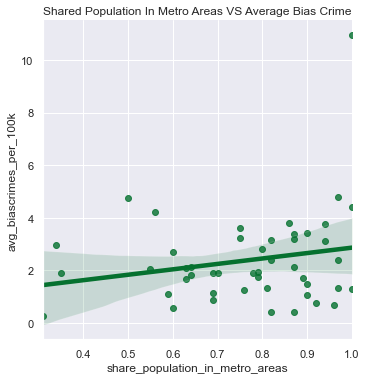

In [50]:
sns.set_style("darkgrid")
sns.set_palette("Greens_r")
sns.lmplot(x= 'share_population_in_metro_areas', y = 'avg_biascrimes_per_100k', data = df2)
plt.title('Shared Population In Metro Areas VS Average Bias Crime')

# the plot shows that there is no significant correlation between shared population in metro areas and average bias
# crime 
# the plot also shows that shared population increases as average biased crime increase from the start 
# Then as shared population continues to increase it shows there's no pattern between the two variables 
# The plot shows one outlier

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that urbanisation has a significant effect on levels of bias crimes

In [13]:
# Using regression analysis
reg1 = 'share_population_in_metro_areas ~ avg_biascrimes_per_100k'
regoutput1 = smf.ols(reg1,df2).fit() 

# using the corr function to check for correlation

correlation1 = df2[['share_population_in_metro_areas','avg_biascrimes_per_100k']].corr()
print(regoutput1.summary())
print('\n \n THE CORRELATION TABLE FOR SHARED POPULATION IN METRO AREAS AND AVG BIAS CRIME \n', correlation1) 

# The correlation value between the two variables is 0.209463. This shows that there is no significant 
# relationship between the two variables
# From the OLS Regression results the R-squared which means the coefficient of determination is 0.044 
# that means the regression model explains 4.4 percent of the variability in the response
# The R-squared value is meant to show us how good the model will work, but in this case the value is very small
# which means our model might not be good enough
# The P value is greater than 0.05 which is not significant
# In conclusion, our model doesn't explain much on the variability and also it is not significant.
# The equation of the model is share_population_in_metro_areas = 0.7153 + 0.0213(avg_biascrimes_per_100k)

                                   OLS Regression Results                                  
Dep. Variable:     share_population_in_metro_areas   R-squared:                       0.044
Model:                                         OLS   Adj. R-squared:                  0.023
Method:                              Least Squares   F-statistic:                     2.065
Date:                             Mon, 24 Jan 2022   Prob (F-statistic):              0.158
Time:                                     21:10:14   Log-Likelihood:                 16.193
No. Observations:                               47   AIC:                            -28.39
Df Residuals:                                   45   BIC:                            -24.69
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                              coef    std err          t      P>|t|      [0.025 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


# Task 2


**This is task I enjoyed most in the assignment because I have a good knowledge of pandas having done a course; Data Analysis With Pandas And Python prior to resumption of the sessions except for the statistical part of the task where I had refer to my Statistical Inference note, google search and check youtube on how to check for correlation between two variables and methods to use.** 

**The first question for task 2 was direct, reading two csv data from two files and then merging. I read the two files separately into two separate data frames then I merged them using the merge() function on the column (region), both data frames df and df1 have a common column(region). Another method that can be used to merge is the pd.merge() function.** 

**The second question was to clean the merged data that is remove row containing missing values and the column 'share_voters_voted_to_the_right' the method used to remove unwanted row and column is the dropna() and drop() method and setting the axis as 0 (row) or 1 (column) and setting the inplace parameter to "TRUE" to effect changes on the operation. Using the dropna() method for rows and drop() for column and setting inplace parameter to "TRUE" is the only way to permanently remove unwanted rows or columns in a data frame.**

**The third question was to visualise the variables x= 'median_household_income', y = 'avg_biascrimes_per_100k' using matplotlib or seaborn. I plotted a series of graphs using both matplotlib and seaborn but after much comparison on which visual tool to use, I decided to use seaborn because the graphs output were more colourful compared to the graphs output of matplotlib.** 

**For the fourth question, which is to test if there is any significant correlation between 'median_household_income' and 'avg_biascrimes_per_100k'. I had to refer to the web to check for examples on how to check for correlation between two variables, the most common method I saw was using the corr() function and other statistical methods which I wasn't sure solved the question. I had to settle on using both a regression analysis model and the corr() method. I used the regression analysis model to show if there is a linear relationship between the two variables 'median_household_income' and 'avg_biascrimes_per_100k'. I imported Statsmodel to perform linear regression, another method that can be used is the Sci-kit method to perform linear regression.**


**The fifth question for Task 2 is similar to the third question just that we are concerned about different variables. I used the approach I used in solving the third question. I only changed the  palette colour.** 

**The last question for Task 2 is also similar to the fourth question. I used the regression analysis model and the corr() function on the selected variable as I did in the fourth question of Task 2.**




<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>